In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [65]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [66]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
print(df.shape)

(10000, 14)


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [69]:
df.duplicated().sum()

0

In [70]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [71]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [72]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [73]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [74]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [75]:
df= pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [76]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [77]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [78]:
X


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [79]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [80]:
X_train.shape

(8000, 11)

In [81]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [82]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [83]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [84]:
model= Sequential()

#input layer
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu')) 
#output layer
model.add(Dense(1,activation='sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [87]:
history=model.fit(X_train_scaled,y_train,epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5879 - loss: 0.6695 - val_accuracy: 0.7981 - val_loss: 0.4903
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8010 - loss: 0.4725 - val_accuracy: 0.7981 - val_loss: 0.4533
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8082 - loss: 0.4366 - val_accuracy: 0.8075 - val_loss: 0.4359
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8209 - loss: 0.4209 - val_accuracy: 0.8163 - val_loss: 0.4274
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8240 - loss: 0.4158 - val_accuracy: 0.8213 - val_loss: 0.4223
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8192 - loss: 0.4278 - val_accuracy: 0.8213 - val_loss: 0.4177
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8255 - loss: 0.4157 - val_accuracy: 0.8219 - val_loss: 0.4139
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8302 - loss: 0.3979 - val_accu

In [88]:
model.layers[0].get_weights()

[array([[-3.19627076e-02, -1.06686354e-01,  8.02946165e-02,
          2.76895136e-01,  1.23514235e-01, -4.71870638e-02,
          2.98791323e-02, -1.87287969e-03, -4.92387503e-01,
          2.40737442e-02, -1.11191608e-02],
        [ 1.95846245e-01, -2.06129104e-01, -9.06038105e-01,
          2.32822180e-01, -7.37770796e-01,  1.66673914e-01,
          6.08839810e-01, -1.13242853e+00, -2.69391477e-01,
         -2.07534686e-01,  5.87559164e-01],
        [-3.42444807e-01, -9.80919972e-03, -3.16192806e-01,
          1.00317113e-01, -4.70787399e-02, -2.32561052e-01,
         -1.36868998e-01,  3.68615061e-01, -6.38920784e-01,
          7.07888305e-02,  5.74621707e-02],
        [-9.59708989e-02, -8.04632008e-01,  3.54217112e-01,
          3.94927979e-01, -5.03407478e-01,  2.87493952e-02,
         -2.62464941e-01, -1.83779925e-01,  5.26171029e-01,
         -6.89527333e-01, -2.33386323e-01],
        [-8.68796229e-01,  2.79559523e-01,  6.00040182e-02,
         -5.86204469e-01,  7.14723617e-02,  

In [89]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [90]:
y_pred=np.where(y_log>0.5,1,0)

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8645

In [92]:
 import matplotlib.pyplot as plt

In [93]:
history.history

{'accuracy': [0.7135937213897705,
  0.7978125214576721,
  0.8034374713897705,
  0.8167187571525574,
  0.8217187523841858,
  0.824999988079071,
  0.8276562690734863,
  0.8260937333106995,
  0.8290625214576721,
  0.8309375047683716,
  0.8298437595367432,
  0.8309375047683716,
  0.8345312476158142,
  0.8396875262260437,
  0.8434374928474426,
  0.8510937690734863,
  0.8510937690734863,
  0.8553125262260437,
  0.8565624952316284,
  0.8568750023841858,
  0.8592187762260437,
  0.8617187738418579,
  0.8609374761581421,
  0.8607812523841858,
  0.8618749976158142,
  0.8614062666893005,
  0.8626562356948853,
  0.8628125190734863,
  0.864062488079071,
  0.8653125166893005,
  0.8637499809265137,
  0.8648437261581421,
  0.864062488079071,
  0.8648437261581421,
  0.8628125190734863,
  0.8651562333106995,
  0.8667187690734863,
  0.8657812476158142,
  0.8676562309265137,
  0.8656250238418579,
  0.8662499785423279,
  0.8675000071525574,
  0.8676562309265137,
  0.8675000071525574,
  0.8650000095367432,
 

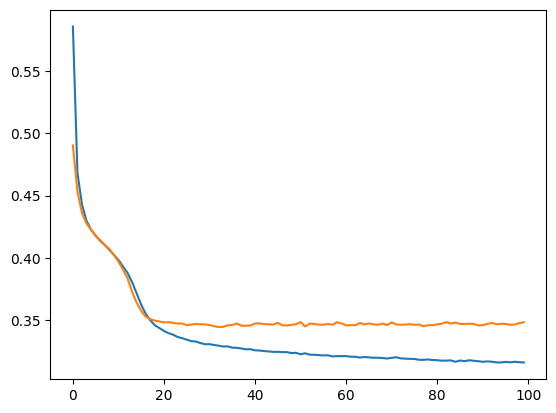

In [94]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

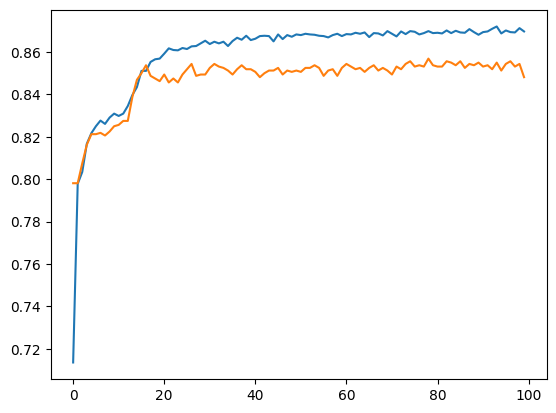

In [95]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8645
Precision: 0.7432
Recall: 0.5301
F1-Score: 0.6188

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1585
           1       0.74      0.53      0.62       415

    accuracy                           0.86      2000
   macro avg       0.81      0.74      0.77      2000
weighted avg       0.86      0.86      0.86      2000

